<a href="https://colab.research.google.com/github/Jorge-89/Regresiones_TP_UNSAM/blob/main/ArbolyBosque_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importo librerias necesarias
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.pipeline import Pipeline
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#se importa el set de datos
url = 'https://raw.githubusercontent.com/Jorge-89/Regresion-Lineal-/main/base_datos_estaciones_met_V3_train.csv'
df = pd.read_csv(url, sep=",")
df.columns

Index(['Unnamed: 0', 'fecha_completa', 'Fecha', 'Hora',
       'Temp_Alicia AgriculturaCba', 'Humedad_Alicia AgriculturaCba',
       'PP_Alicia AgriculturaCba', 'Temp_Las Varas AgriculturaCba',
       'Humedad_Las Varas AgriculturaCba', 'PP_Las Varas AgriculturaCba',
       'Temp_San Miguel - Establecimiento Don Luis',
       'Humedad_San Miguel - Establecimiento Don Luis',
       'PP_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'PP_San Miguel - Listello', 'Temp_ San Miguel - Las Varillas',
       'Humedad_ San Miguel - Las Varillas', 'PP_ San Miguel - Las Varillas'],
      dtype='object')

In [ ]:
x= df[[ 'Temp_Las Varas AgriculturaCba', 'Humedad_Las Varas AgriculturaCba',
        'Temp_San Miguel - Establecimiento Don Luis', 'Humedad_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'Temp_ San Miguel - Las Varillas', 'Humedad_ San Miguel - Las Varillas']]
y= df["Temp_Alicia AgriculturaCba"]


In [ ]:
#Separo los datos de "train" en entrenamiento y prueba "test" para probar los algoritmos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
clf = tree.DecisionTreeRegressor()
params={'max_depth':[4,5,6,7],'min_samples_leaf':[5,10,50], 'max_leaf_nodes':[2,5,10]}
grilla=GridSearchCV(clf,params,cv=5,scoring='neg_mean_squared_error', verbose=3)
grilla.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=4, max_leaf_nodes=2, min_samples_leaf=5 ...............
[CV]  max_depth=4, max_leaf_nodes=2, min_samples_leaf=5, score=-10.678, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=2, min_samples_leaf=5 ...............
[CV]  max_depth=4, max_leaf_nodes=2, min_samples_leaf=5, score=-10.431, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=2, min_samples_leaf=5 ...............
[CV]  max_depth=4, max_leaf_nodes=2, min_samples_leaf=5, score=-10.246, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=2, min_samples_leaf=5 ...............
[CV]  max_depth=4, max_leaf_nodes=2, min_samples_leaf=5, score=-10.138, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=2, min_samples_leaf=5 ...............
[CV]  max_depth=4, max_leaf_nodes=2, min_samples_leaf=5, score=-10.125, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=2, min_samples_leaf=10 ..............
[CV]  max_depth=4, max_leaf_nodes=2, min_samples_leaf=10, score=-10.678, total=   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=5, min_samples_leaf=5, score=-2.976, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=5, min_samples_leaf=5 ...............
[CV]  max_depth=4, max_leaf_nodes=5, min_samples_leaf=5, score=-3.159, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=5, min_samples_leaf=5 ...............
[CV]  max_depth=4, max_leaf_nodes=5, min_samples_leaf=5, score=-2.917, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=5, min_samples_leaf=5 ...............
[CV]  max_depth=4, max_leaf_nodes=5, min_samples_leaf=5, score=-2.920, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=5, min_samples_leaf=5 ...............
[CV]  max_depth=4, max_leaf_nodes=5, min_samples_leaf=5, score=-2.847, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=5, min_samples_leaf=10 ..............
[CV]  max_depth=4, max_leaf_nodes=5, min_samples_leaf=10, score=-2.976, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=5, min_samples_leaf=10 ..............
[CV]  max_depth=4, max_leaf_nodes=5, min_samples_leaf=10, score

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    3.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_leaf_nodes': [2, 5, 10],
                         'min_samples_leaf': [5,

In [ ]:
grilla.best_params_

{'max_depth': 7, 'max_leaf_nodes': 10, 'min_samples_leaf': 50}

In [ ]:
grilla.best_score_

-1.424544056862522

In [ ]:
# Fit best model
modelo=grilla.best_estimator_
modelo.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=50, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred_test = modelo.predict(x_test)
y_pred_test

array([24.2085034 , 26.74520231, 16.12530414, ..., 34.39255319,
       26.74520231, 26.74520231])

In [ ]:
#se puede usar scoring='neg_root_mean_squared_error' tambien que seria la raiz
MSE_modelo=cross_val_score(modelo,x_test,y_test,cv=5,scoring='neg_mean_squared_error')
errores = -MSE_modelo
MSE_modelo


array([-1.41620364, -1.47776877, -1.62937862, -1.41321439, -1.55051289])

In [ ]:
print(errores.mean(), errores.std())

1.4974156626275843 0.08283089493891993


Se observa como el arbol empieza a sobreajustar, ya que el MSE de entrenamiento, se puede mejorar y hacerse más pequeño, pero el test no mejora el MSE, aún con ajustes de hiperparametros


Profundidad del árbol: 4
Número de nodos terminales: 10


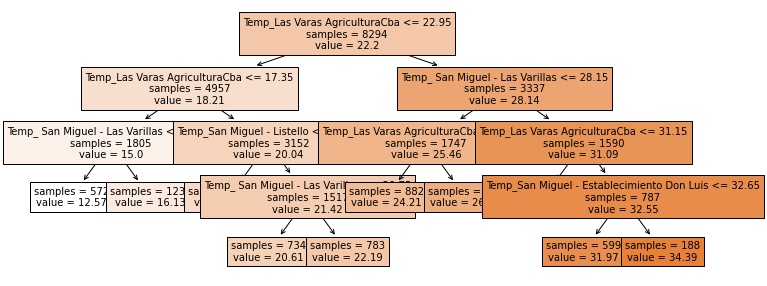

In [ ]:
# Estructura del árbol creado

fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = x.columns,
            class_names   = 'MEDV',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': x.columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,Temp_Las Varas AgriculturaCba,0.847269
6,Temp_ San Miguel - Las Varillas,0.122615
4,Temp_San Miguel - Listello,0.022235
2,Temp_San Miguel - Establecimiento Don Luis,0.007881
1,Humedad_Las Varas AgriculturaCba,0.000000
3,Humedad_San Miguel - Establecimiento Don Luis,0.000000
5,Humedad_San Miguel - Listello,0.000000
7,Humedad_ San Miguel - Las Varillas,0.000000


RandomForestRegressor

In [ ]:
clf = RandomForestRegressor()
params={'max_depth':[7,8,9,10,11],'min_samples_leaf':[20,25,50], 'max_leaf_nodes':[10,20,30,40,50,80,100], 'n_estimators':[650,700]}
grilla=RandomizedSearchCV(clf,params,cv=5,scoring='neg_mean_squared_error', verbose=3)
grilla.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, min_samples_leaf=50, max_leaf_nodes=30, max_depth=7 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, min_samples_leaf=50, max_leaf_nodes=30, max_depth=7, score=-0.650, total=  10.1s
[CV] n_estimators=700, min_samples_leaf=50, max_leaf_nodes=30, max_depth=7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.1s remaining:    0.0s


[CV]  n_estimators=700, min_samples_leaf=50, max_leaf_nodes=30, max_depth=7, score=-0.676, total=  10.1s
[CV] n_estimators=700, min_samples_leaf=50, max_leaf_nodes=30, max_depth=7 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   20.2s remaining:    0.0s


[CV]  n_estimators=700, min_samples_leaf=50, max_leaf_nodes=30, max_depth=7, score=-0.605, total=  10.1s
[CV] n_estimators=700, min_samples_leaf=50, max_leaf_nodes=30, max_depth=7 
[CV]  n_estimators=700, min_samples_leaf=50, max_leaf_nodes=30, max_depth=7, score=-0.652, total=  10.1s
[CV] n_estimators=700, min_samples_leaf=50, max_leaf_nodes=30, max_depth=7 
[CV]  n_estimators=700, min_samples_leaf=50, max_leaf_nodes=30, max_depth=7, score=-0.697, total=  10.1s
[CV] n_estimators=650, min_samples_leaf=25, max_leaf_nodes=50, max_depth=9 
[CV]  n_estimators=650, min_samples_leaf=25, max_leaf_nodes=50, max_depth=9, score=-0.580, total=  10.6s
[CV] n_estimators=650, min_samples_leaf=25, max_leaf_nodes=50, max_depth=9 
[CV]  n_estimators=650, min_samples_leaf=25, max_leaf_nodes=50, max_depth=9, score=-0.611, total=  10.6s
[CV] n_estimators=650, min_samples_leaf=25, max_leaf_nodes=50, max_depth=9 
[CV]  n_estimators=650, min_samples_leaf=25, max_leaf_nodes=50, max_depth=9, score=-0.551, tota

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
grilla.best_params_

{'max_depth': 10,
 'max_leaf_nodes': 80,
 'min_samples_leaf': 20,
 'n_estimators': 700}

In [ ]:
grilla.best_score_

-0.5546243600444616

In [ ]:
# Fit best model
modelo=grilla.best_estimator_
modelo.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=80,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [18]:
clf = RandomForestRegressor()
params={'max_depth':[10],'min_samples_leaf':[20], 'max_leaf_nodes':[80], 'n_estimators':[700]}
grilla=RandomizedSearchCV(clf,params,cv=2,scoring='neg_mean_squared_error', verbose=3)
grilla.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] n_estimators=700, min_samples_leaf=20, max_leaf_nodes=80, max_depth=10 
[CV]  n_estimators=700, min_samples_leaf=20, max_leaf_nodes=80, max_depth=10, score=-0.558, total=   8.0s
[CV] n_estimators=700, min_samples_leaf=20, max_leaf_nodes=80, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s


[CV]  n_estimators=700, min_samples_leaf=20, max_leaf_nodes=80, max_depth=10, score=-0.582, total=   7.9s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.9s finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [19]:
# Fit best model
modelo=grilla.best_estimator_
modelo.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=80,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [20]:
y_pred_test = modelo.predict(x_test)
y_pred_test

array([24.58220755, 27.26545377, 15.01414162, ..., 34.10638503,
       26.95203396, 28.658017  ])

In [21]:
print('Precisión del modelo usando el (MSE):')
score_testeo = mse(y_test,y_pred_test)

print (score_testeo)

Precisión del modelo usando el (MSE):
0.5775841159153159
